<a href="https://colab.research.google.com/github/Kavinyasheilla/dsc-phase1-project/blob/main/dsc_phase1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis For Aircraft Analysis.
Done by Sheilla Muli

PROJECT OVERVIEW
- The company is expanding into the aviation but lacks knowledge of potential risks across different aiarcrafts.
- This notebook anaalyze avaiation accident data identify low-risk aircraft and provide business recommendations.  

Objectives
 - Clean and prepare aviation accident data.  
- Explore accident trends by year, manufacturer, weather, and flight purpose.  
- Identify high-risk and low-risk aircraft manufacturers.  
- Provide insights for safer investment decisions in aviation.

In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#loading the csv file
#csv file is stored in myDrive together with the python code
from google.colab import drive
drive.mount ('/content/drive')
file_path = "/content/drive/My Drive/Dsc-phase1-project/Aviation_Data.csv"
df = pd.read_csv(file_path, low_memory=False)
#to check if it has been loaded
df.head()
df.shape

Mounted at /content/drive


(90348, 31)

In [ ]:
#Data inspection- to better understand the data set and what I am dealing with
df.info

df.isnull().mean().sort_values(ascending=False).head(20)


,0
Schedule,0.860738
Air.carrier,0.815735
FAR.Description,0.645559
Aircraft.Category,0.642637
Longitude,0.619549
Latitude,0.619449
Airport.Code,0.445123
Airport.Name,0.416656
Broad.phase.of.flight,0.316819
Publication.Date,0.184719


Data cleaning
To do
 Drop irrelevant columns
- Handle missing values.  
- Standardize column names for consistency.  
- Convert date fields into datetime format.

In [ ]:
#data cleaning
#removing colums I do not need
drop_cols = ['Latitude' , 'Longitude', 'Registration.Number' , 'Airport.Code' , 'Model' , 'Amature.Built' , 'Engine.Type' , 'FAR Description' , 'Schedule']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

#now I handle missing values in the columns that are not droped
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]

for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

#then I remove duplicates
df = df.drop_duplicates()

#get the data types to be the same
if 'Event.Date' in df.columns:
   df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


#convert data to int
for col in ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']:
  if col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

if 'Event.Date' in df.columns:
  df['Year'] = df['Event.Date'].dt.year
  df['Month'] = df['Event.Date'].dt.month
  df['Day'] = df['Event.Date'].dt.day

if all(col in df.columns for col in ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']):
    df['Total.Injuries'] = (
        df['Total.Fatal.Injuries'] +
        df['Total.Serious.Injuries'] +
        df['Total.Minor.Injuries']
    )

    if 'Total.fatal.Injuries' in df.columns:
      df['Severity'] = np.where(df['Total.Fatal.Injuries'] > 0, 'FATAL', 'NON-FATAL')


for col in ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Injuries']:
    if col in df.columns:
        upper = df[col].quantile(0.99)
        df[col] = np.where(df[col] > upper, upper, df[col])

#check if everything is upto par
print("✅ Data Cleaning Done")
print(df.info())
print(df.head())

✅ Data Cleaning Done
<class 'pandas.core.frame.DataFrame'>
Index: 88954 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88954 non-null  object        
 1   Investigation.Type      88954 non-null  object        
 2   Accident.Number         88954 non-null  object        
 3   Event.Date              88954 non-null  datetime64[ns]
 4   Location                88954 non-null  object        
 5   Country                 88954 non-null  object        
 6   Airport.Name            88954 non-null  object        
 7   Injury.Severity         88954 non-null  object        
 8   Aircraft.damage         88954 non-null  object        
 9   Make                    88954 non-null  object        
 10  Amateur.Built           88954 non-null  object        
 11  Number.of.Engines       88954 non-null  float64       
 12  Purpose.of.flight       88954 

In [ ]:
#clean column names
def clean_column_names (df):
   df = df.copy()
   df.columns = (
   df.columns.str.strip()
      .str.replace('.', '', regex=False)
      .str.replace('/', '_', regex=False)
      .str.replace(' ', '_', regex=False)
      .str.lower()
   )
   return df

   df = clean_column_names(df)
   df.columns.tolist()

In [ ]:
# trim and normalize case
for c in ['make','model','airport_name','location','air_carrier']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.title().replace({'Nan':'Unknown'})



In [ ]:
#check if the changes have taken effect and how they look
df.info
df.head

print (df.info)
print (df.head)

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
90343  20221227106491           Accident      ERA23LA093 2022-12-26   
90344  20221227106494           Accident      ERA23LA095 2022-12-26   
90345  20221227106497           Accident      WPR23LA075 2022-12-26   
90346  20221227106498           Accident      WPR23LA076 2022-12-26   
90347  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country Airport.Name Injury.Severity  \
0      MOOSE CREEK, ID  United States      Pr

EXPLARATORY DATA ANALYSIS
Explore data sets to understand historical patterns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Accidents by manufacturer
- Different manufacturers have varying accident rates. This helps identify high-risk and low-risk brands.  

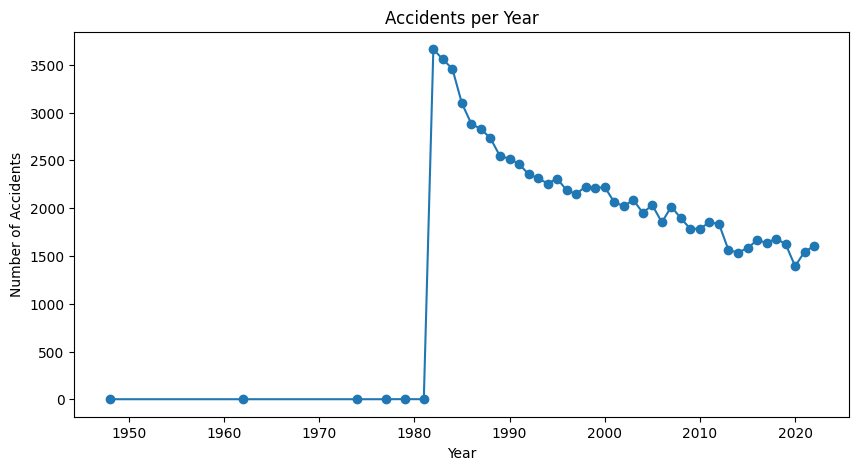

In [ ]:
#Accident Trends over time


accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_year.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

Accident severity  distribution
- Look at the breakdown of fatal vs non-fatal accidents.  

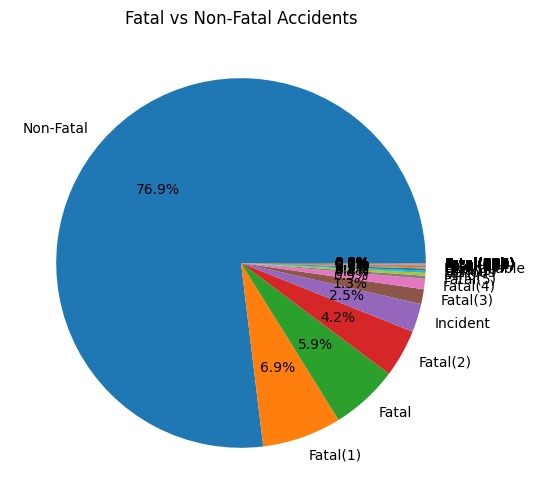

In [ ]:
#Fatal vs Non-Fatal Accidents
severity_counts = df['Injury.Severity'].value_counts()
severity_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Fatal vs Non-Fatal Accidents")
plt.ylabel("")
plt.show()

Accidents by aircraft manufactuer
- It is important to understand which comapny prodeces the best aircrafts and how they perform in action in terms of accidents


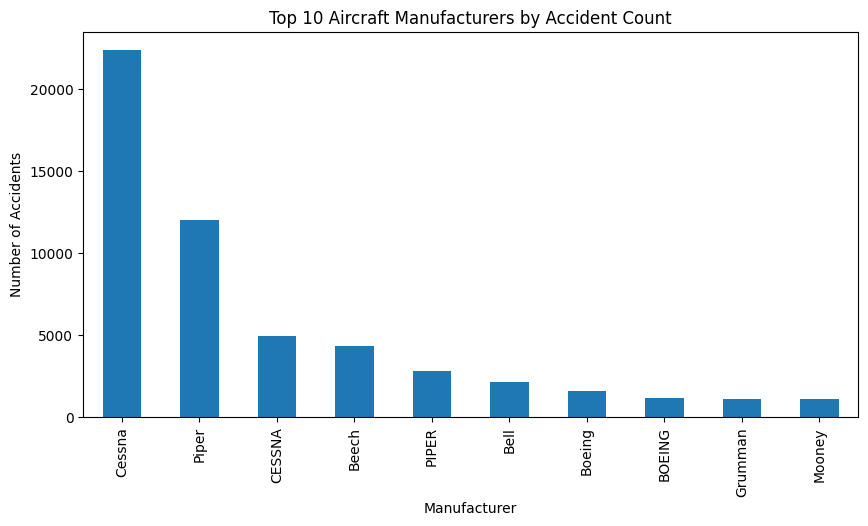

In [ ]:
#Accidents by aicraft manufacturer (make)

top_makes = df['Make'].value_counts().head(10)
top_makes.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Aircraft Manufacturers by Accident Count")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.show()

In [ ]:
#column mapping to help with the eda stage- not sure if this works honestly
col_map = {
    'event_date':None,
    'make': None,
    'model': None,
    'aircraft_category': None,
    'total_fatal_injuries': None,
    'total_serious_injuries': None,
    'total_minor_injuries': None,
    'total_injuries': None,
    'total_uninjured': None,
    'weather_condition': None,
    'airport_name': None,
    'location': None,
    'air_carrier': None,
    'year': None,
    'month': None,
    'day': None,
    'year_of_manufacture': None,
    'registration_number': None,
    'engine_type': None,
    'engine_manufacturer': None,


}

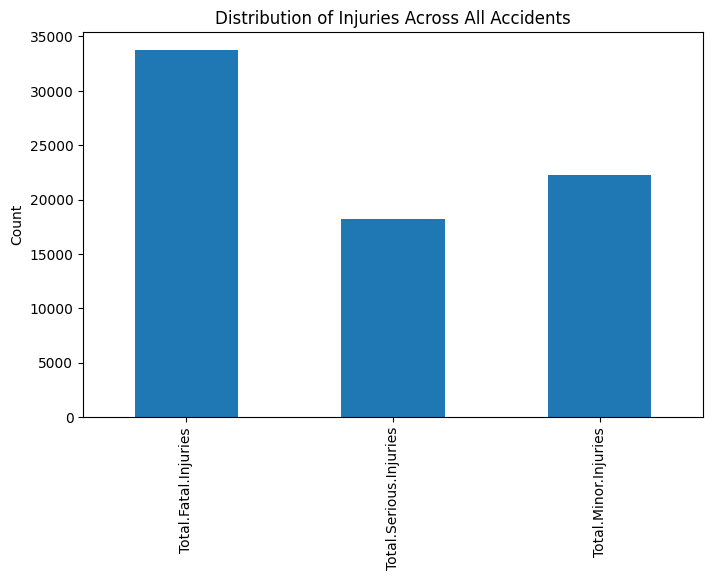

In [ ]:
#Injury Analysis
injuries = df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].sum()
injuries.plot(kind='bar', figsize=(8,5))
plt.title("Distribution of Injuries Across All Accidents")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-205383992.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Relative_Risk', y='Aircraft_Model', data=top_risky, palette="Reds_r")


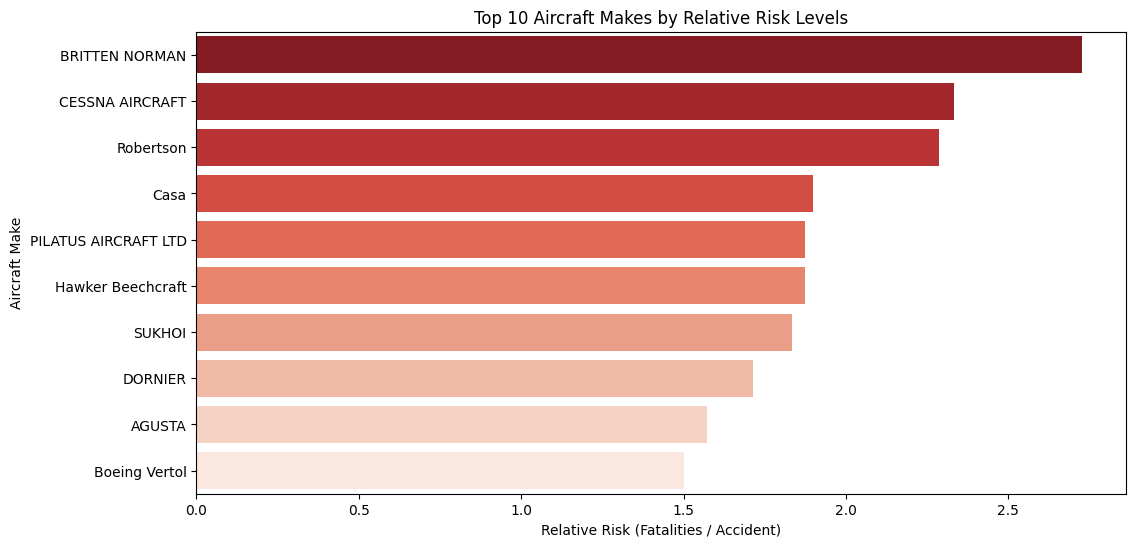

In [ ]:
#Aircraft models by Relative risk levels
import matplotlib.pyplot as plt
import seaborn as sns

# Create aircraft model column using only 'Make'
df['Aircraft_Model'] = df['Make'].astype(str)

# Group by model and calculate risk
model_stats = df.groupby('Aircraft_Model').agg(
    total_accidents = ('Event.Id', 'count'),
    total_fatalities = ('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculating relative risk = fatalities per accident
model_stats['Relative_Risk'] = model_stats['total_fatalities'] / model_stats['total_accidents']

# Geting top 10 risky models
top_risky = model_stats[model_stats['total_accidents'] > 5].sort_values('Relative_Risk', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Relative_Risk', y='Aircraft_Model', data=top_risky, palette="Reds_r")
plt.title("Top 10 Aircraft Makes by Relative Risk Levels")
plt.xlabel("Relative Risk (Fatalities / Accident)")
plt.ylabel("Aircraft Make")
plt.show()

In [ ]:
#crate a risk score- sice we do not have aircraft age
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)

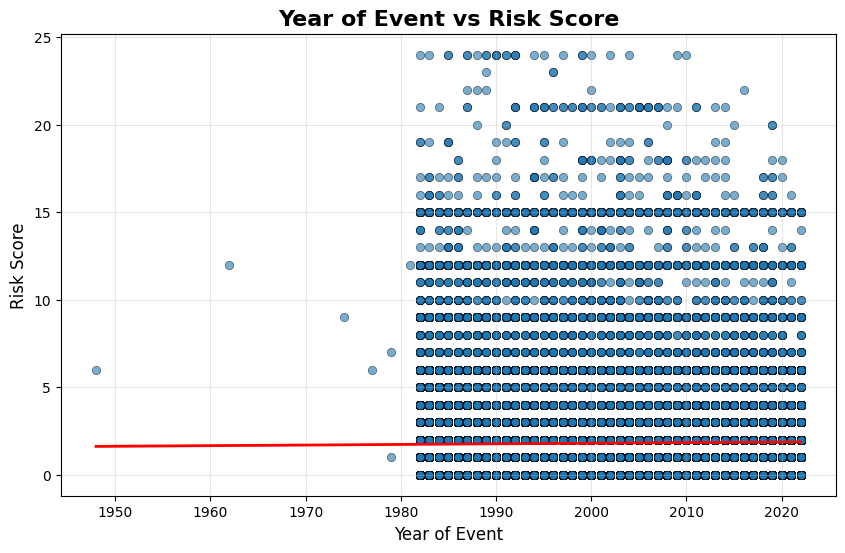

In [ ]:
#age vs risk


#crating a risk score- sice we do not have aircraft age
df['Risk_Score'] = (df['Total.Fatal.Injuries'] * 3 +
                    df['Total.Serious.Injuries'] * 2 +
                    df['Total.Minor.Injuries'] * 1)
#preparing data for plot
import pandas as pd

# Converting Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extracting the year of the event
df['Event_Year'] = df['Event.Date'].dt.year

#now we plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Event_Year',
    y='Risk_Score',
    alpha=0.6,
    edgecolor='k'
)

# Adding a trend line
sns.regplot(
    data=df,
    x='Event_Year',
    y='Risk_Score',
    scatter=False,
    color='red',
    line_kws={"linewidth":2}
)

plt.title("Year of Event vs Risk Score", fontsize=16, fontweight='bold')
plt.xlabel("Year of Event", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

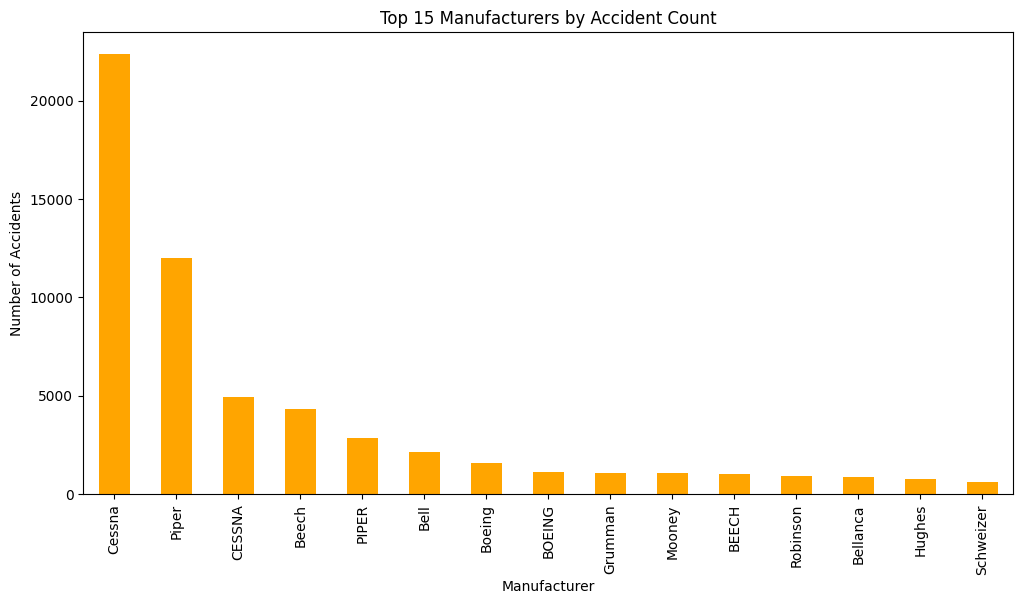

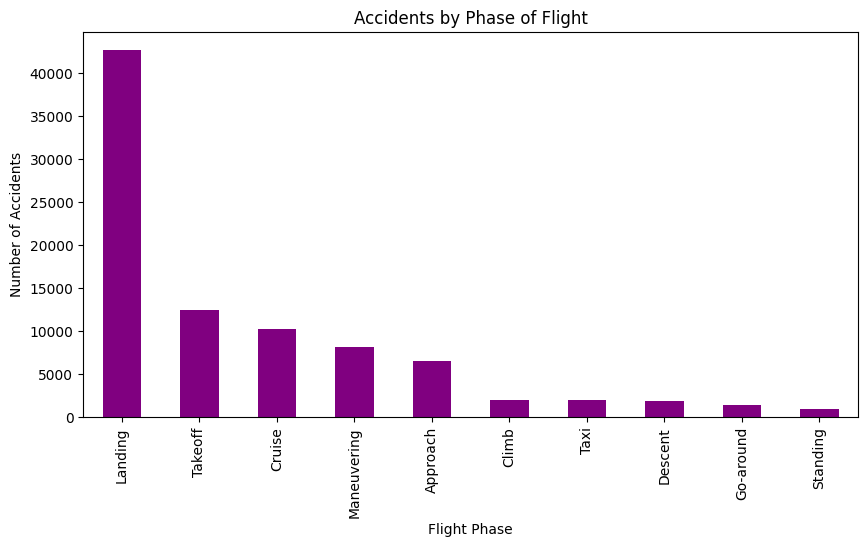

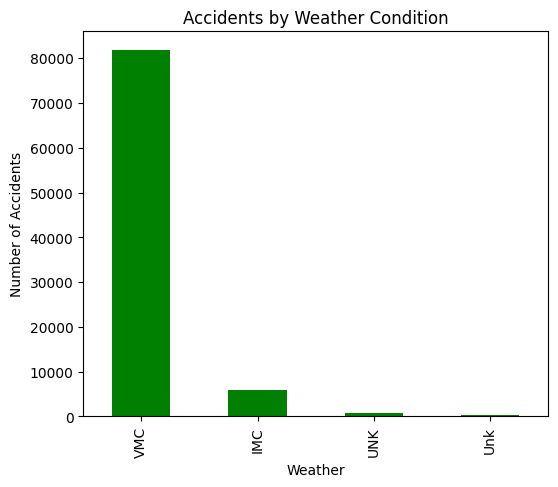

In [ ]:
#Accidents by phase of flight
# By Manufacturer
plt.figure(figsize=(12,6))
df['Make'].value_counts().head(15).plot(kind='bar', color='orange')
plt.title("Top 15 Manufacturers by Accident Count")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.show()

# By Broad Phase of Flight
plt.figure(figsize=(10,5))
df['Broad.phase.of.flight'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Accidents by Phase of Flight")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.show()

# By Weather Condition
plt.figure(figsize=(6,5))
df['Weather.Condition'].value_counts().plot(kind='bar', color='green')
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.show()

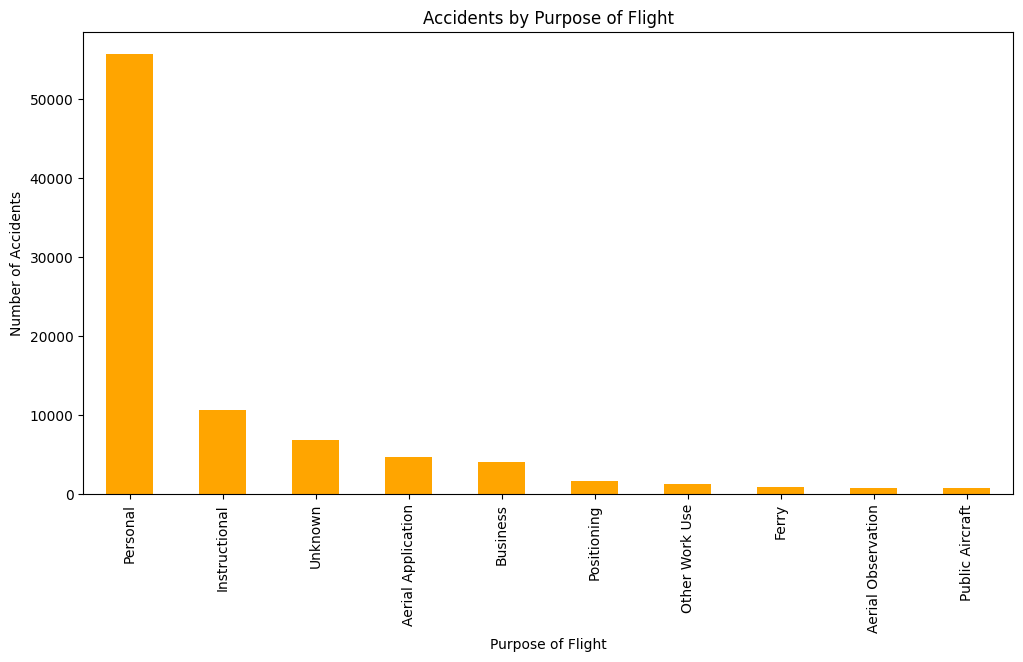

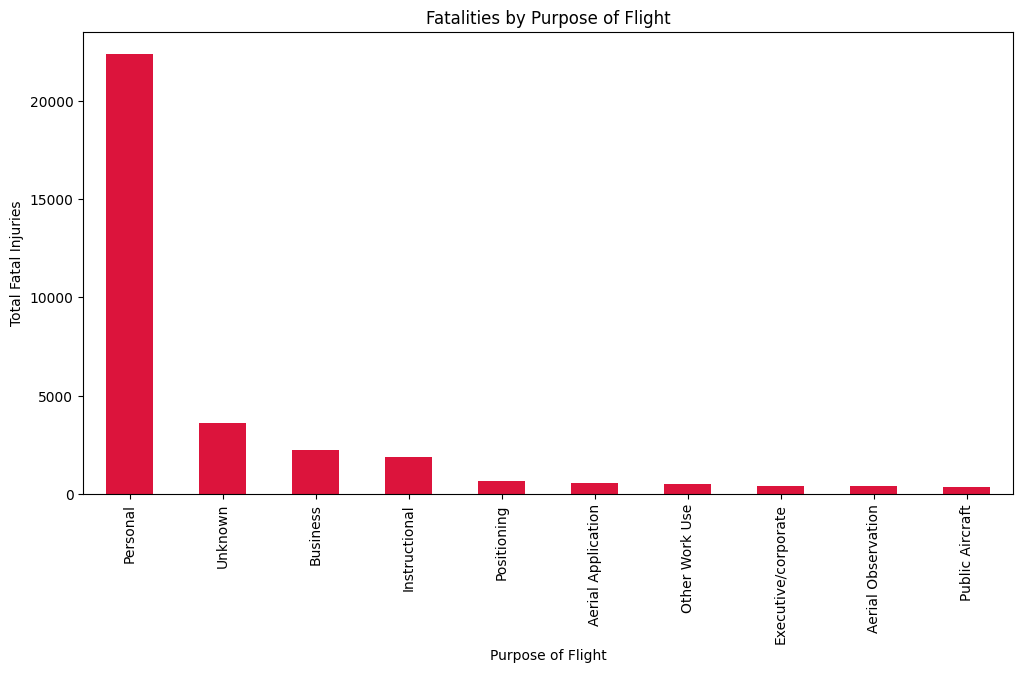

In [ ]:
#Flight purpose
# Accidents by Purpose of Flight
plt.figure(figsize=(12,6))
df['Purpose.of.flight'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Accidents by Purpose of Flight")
plt.xlabel("Purpose of Flight")
plt.ylabel("Number of Accidents")
plt.show()

# Fatalities by Purpose of Flight
purpose_fatalities = df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
purpose_fatalities.plot(kind='bar', color='crimson')
plt.title("Fatalities by Purpose of Flight")
plt.xlabel("Purpose of Flight")
plt.ylabel("Total Fatal Injuries")
plt.show()


In [ ]:
#Saving all the changes
df.to_csv("Aviation_Data_Cleaned.csv", index=False)

In [ ]:
#Downloading files
from google.colab import files

files.download("Aviation_Data_Cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conclusion & Recommendations

Summary of Findings
- Accident frequency varies significantly by manufacturer.  
- Fatal accidents are concentrated in specific makes and models.  
- Weather and flight purpose also impact accident likelihood.  

Recommendations
1. Invest in manufacturers with the lowest accident and risk scores.  
2. Avoid high-risk aircraft brands identified in this analysis.  
3. Implement stronger safety checks for flights with high-risk profiles.  
4. Use data-driven monitoring to continually update risk assessments.  

Next Steps
- Build predictive models for accident likelihood.  
- Integrate external datasets (weather, maintenance logs).  
- Develop interactive dashboards for real-time risk tracking.  
